<a href="https://colab.research.google.com/github/Code-Abbey/Unsupervised_Learning_Clustering/blob/main/Unsupervised_Clustering_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Machine Learning/Mall_Customers.csv")

data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [2]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

**Agglomerative label**

In [3]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


**Agglomerative cluster plot**

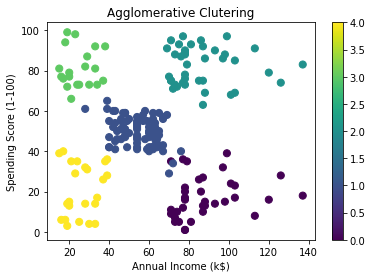

In [4]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

**Agglomerative Cluster Interpretation:**


**Customers in green:** have a small annual income but they tend to spend a lot. We can call them the extravagants.

**Customers in yellow:** Customers with low income who don’t spend a lot. We can call them the cautious ones.

**Customers in blue:** Customers with an average income and average spending. They are normal customers.

**Customers in light blue:** Customers with high annual income and high spending score. They are generous customers.

**Customers in purple:** Customers with high annual income who don’t spend a lot. We can call them the cheap ones.

**Dendrogram**

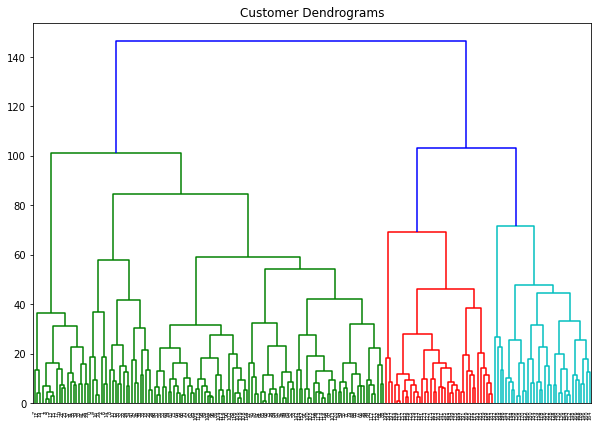

In [5]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [6]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [7]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


In [8]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]
